# Models Comparison for TinyML

In [20]:
# Load libraries
import numpy as np
from numpy import arange
import pickle
#
import matplotlib.pyplot as plt

#
import pandas as pd
from pandas import read_csv

from sklearn.metrics import confusion_matrix,  classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import tensorflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from micromlgen import port
import tinymlgen as tiny

import warnings
import seaborn as sbs
import sys

warnings.filterwarnings('ignore')

In [21]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)
np.set_printoptions(threshold=sys.maxsize)
tasks = ["5Labels", "10Labels", "15Labels", "AllLabels"]
# Change this to change subtask
taskIndex = 2

In [22]:
with open('data/X.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y.pkl', 'rb') as f:
    y = pickle.load(f)

In [23]:
n_labels = 15
samples = 100
X = X[:n_labels*samples]
y = y[:n_labels*samples]
labels = np.unique(y)

In [24]:
classes = np.unique(y).tolist()
for i in range(len(classes)):
    y = np.where(y==classes[i], i, y)

In [25]:
y = np.array([int(el) for el in y])
print(y)

[ 9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)
print(X_test.shape)
print(y_test.shape)


(300, 42)
(300,)


In [27]:
X_test

array([[-0.02, -0.13,  0.99,  0.01, -0.09,  0.93, -0.07, -0.14,  1.24,
         0.07, -0.12,  0.84,  0.12, -0.01,  0.74,  0.1 ,  0.13,  0.99,
         0.01,  0.1 ,  1.11, -0.04, -0.09,  1.05,  0.02,  0.02,  0.99,
         0.03,  0.03,  0.95,  0.02,  0.02,  0.96, -0.02, -0.04,  1.  ,
         0.04,  0.04,  0.98,  0.01, -0.01,  1.  ],
       [ 0.11, -0.  ,  0.97,  0.11, -0.18,  1.14,  0.04, -0.06,  0.6 ,
         0.04,  0.35,  1.03,  0.06, -0.13,  1.2 ,  0.11,  0.08,  0.8 ,
         0.12,  0.08,  0.94,  0.  , -0.05,  0.92, -0.02,  0.01,  1.07,
        -0.01,  0.29,  1.04,  0.  ,  0.17,  0.83, -0.02, -0.02,  1.08,
         0.04, -0.07,  0.95,  0.09, -0.  ,  0.93],
       [-0.07,  0.03,  0.98, -0.1 , -0.07,  0.97, -0.06,  0.22,  0.85,
        -0.13,  0.22,  1.06, -0.21,  0.16,  1.06, -0.18,  0.  ,  0.99,
        -0.06,  0.07,  0.89, -0.03,  0.02,  0.87, -0.14,  0.17,  1.01,
        -0.2 ,  0.16,  0.94, -0.27,  0.15,  0.91, -0.32,  0.11,  0.97,
        -0.35,  0.12,  0.98, -0.36,  0.15,  0.

In [28]:
y_test

array([ 5,  4, 11, 14, 13, 10, 14,  0,  3, 14,  7,  5,  4,  3,  4,  6,  1,
        2,  1,  5,  2, 11, 13,  6,  7, 13, 11,  6, 12,  8,  5,  5,  0,  2,
       14, 14,  8, 14,  9,  8,  3,  9,  3,  8,  7,  8, 11,  7,  8,  3, 12,
        2, 10, 13, 11,  6,  4,  6,  2,  8,  2,  6,  1,  3,  9, 13, 11,  7,
        7,  3,  7,  5,  1, 11,  6,  8, 13,  4,  1,  0,  1,  7, 13, 12,  0,
        2, 10, 12, 14,  4,  0,  5,  0, 10, 10, 10,  0,  7, 10,  1,  1,  5,
        0,  3, 12,  9,  6, 14, 12,  2,  6, 11,  5,  7,  2,  0,  2,  0,  2,
        3,  9,  5, 13,  2, 11,  6,  1,  0, 11,  0,  0, 14,  6, 10,  1,  0,
        2,  4, 14, 11, 12, 14,  1,  9, 11,  8,  0,  4,  7,  3, 14, 11,  5,
        5,  3, 10, 11,  0, 11,  6,  1, 13,  3,  4,  6,  2,  1,  4,  3,  9,
        9,  6,  8,  7,  9, 12,  3, 12,  5,  1,  0,  0, 13, 14,  3,  9, 13,
        0,  8, 10,  8, 10,  2,  9,  1,  4, 14,  3, 13,  4,  1,  4,  3, 12,
       14,  5, 12, 12,  8,  9,  6, 11,  4,  4,  5,  7, 14, 11, 11, 10,  4,
        6, 14, 12, 12,  2

## Model Spotting

In [29]:
# Test options and evaluation metric
num_folds = 5
seed = 42
scoring = 'f1_macro'

In [30]:
# Spot-Check Algorithms
models = []

#models.append(('XGB', XGBClassifier(random_state=seed)))
models.append(('GNB', GaussianNB(var_smoothing=2e-9)))
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('CART' , DecisionTreeClassifier(random_state=seed)))
models.append(('SVC' , SVC(gamma=0.99, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=100, 
                                                           max_features=5, criterion='gini', max_depth=None,
                                                           min_samples_split=4, min_samples_leaf=1)))


In [31]:
# Cross Validation
results = []
names = []
for name, model in models:
    # Dividere dati in n = num_folds
    kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = np.array([])
    for train_idx, test_idx, in kf.split(X_train, y_train):
        X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
        X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
        model.fit(X_cross_train, y_cross_train)  
        y_pred = model.predict(X_cross_test)
        f1s = f1_score(y_cross_test, y_pred, average="weighted")
        cv_results = np.append(cv_results, [f1s])
    results.append(cv_results)
    names.append(name)
    #msg = "%s - %f - %f" % (name, cv_results.mean(), cv_results.std())
    msg = "{} - {:.2f} {:.2f}".format(name, cv_results.mean(), cv_results.std()).replace('.', ',')
    print(msg)

GNB - 0,84 0,01
LR - 0,85 0,01
CART - 0,67 0,01
SVC - 0,91 0,02
RF - 0,89 0,01


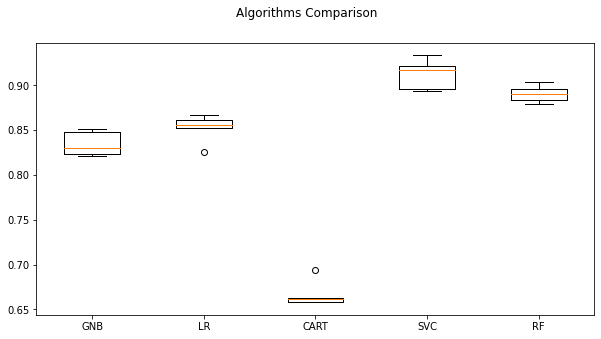

In [32]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Valutazione dei migliori algoritmi su test

## Valutazione modelli sul Test Set

In [33]:
def classification_report_csv(report, model_name):
    report_data = []
    lines = report.split('\n')
    index = 0
    row = lines[-4].split('    ')
    accuracy = row[-2] if taskIndex > 1 else row[-3]
    for line in lines[2:-5]:
        row = {}
        row_data = line.split('      ')
        row['class'] = labels[index]
        row['precision'] = float(row_data[2]) 
        row['recall'] = float(row_data[3]) 
        row['f1_score'] = float(row_data[4])
        row['accuracy'] = accuracy
        report_data.append(row)
        index += 1
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(tasks[taskIndex] + "/classificationReports/" +'report' + model_name +  '.csv', index = False)
    
for name, model in models:
    model.fit(X_train,  y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(f"Model {name}: ")
    report = classification_report(y_test, pred_test)
    print(report)
    classification_report_csv(report, name)
    print("-------------------------------------------------------------")

Model GNB: 
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.80      1.00      0.89        20
           2       0.90      0.90      0.90        20
           3       0.55      0.80      0.65        20
           4       0.83      0.95      0.88        20
           5       0.75      0.60      0.67        20
           6       1.00      0.80      0.89        20
           7       0.94      0.80      0.86        20
           8       0.86      0.90      0.88        20
           9       0.81      0.65      0.72        20
          10       0.90      0.95      0.93        20
          11       0.83      0.95      0.88        20
          12       0.89      0.85      0.87        20
          13       0.88      0.75      0.81        20
          14       0.83      0.75      0.79        20

    accuracy                           0.84       300
   macro avg       0.85      0.84      0.84       300
weighted avg  

# Neural Network

In [34]:
#Hyperparameters of NN
EPOCHS = 500 
BATCH_SIZE = 7
learn_rate = 0.001
nodes = 256
def getNetwork():
    model = Sequential(name="Sequential-NN")
    model.add(layers.Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dropout(0.25))    
    model.add(layers.Dense(nodes, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(np.unique(y).size, activation='softmax'))
    opt = Adam(learning_rate=learn_rate)
    # SGB
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

## Cross Validation NN

In [35]:
num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_results = np.array([])
for train_idx, test_idx, in kf.split(X_train, y_train):
    X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
    X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
    model = getNetwork()
    model.fit(X_cross_train, y_cross_train, epochs=EPOCHS, batch_size=BATCH_SIZE)  
    y_pred = model.predict(X_cross_test)
    predictions_categorical = np.argmax(y_pred, axis=1)
    f1s = f1_score(y_cross_test, predictions_categorical, average="weighted")
    cv_results = np.append(cv_results, [f1s])

print(f'Average score of Cross Validation: {cv_results.mean()}')

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 42)                1806      
_________________________________________________________________
dropout_4 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               11008     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                3855      
Total params: 16,669
Trainable params: 16,669
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
138/138 [==============================] - 0s 1ms/step - loss: 2.6518 - accuracy: 0.1354
Epoch 2/500
13

138/138 [==============================] - 0s 565us/step - loss: 0.2782 - accuracy: 0.8979
Epoch 71/500
138/138 [==============================] - 0s 585us/step - loss: 0.2676 - accuracy: 0.9146
Epoch 72/500
138/138 [==============================] - 0s 564us/step - loss: 0.2651 - accuracy: 0.9083
Epoch 73/500
138/138 [==============================] - 0s 560us/step - loss: 0.2543 - accuracy: 0.9062
Epoch 74/500
138/138 [==============================] - 0s 549us/step - loss: 0.3002 - accuracy: 0.8969
Epoch 75/500
138/138 [==============================] - 0s 537us/step - loss: 0.2498 - accuracy: 0.9104
Epoch 76/500
138/138 [==============================] - 0s 538us/step - loss: 0.2373 - accuracy: 0.9198
Epoch 77/500
138/138 [==============================] - 0s 542us/step - loss: 0.2262 - accuracy: 0.9198
Epoch 78/500
138/138 [==============================] - 0s 546us/step - loss: 0.2507 - accuracy: 0.9031
Epoch 79/500
138/138 [==============================] - 0s 562us/step - loss:

138/138 [==============================] - 0s 564us/step - loss: 0.1669 - accuracy: 0.9385
Epoch 149/500
138/138 [==============================] - 0s 547us/step - loss: 0.1888 - accuracy: 0.9333
Epoch 150/500
138/138 [==============================] - 0s 584us/step - loss: 0.1653 - accuracy: 0.9427
Epoch 151/500
138/138 [==============================] - 0s 571us/step - loss: 0.1714 - accuracy: 0.9448
Epoch 152/500
138/138 [==============================] - 0s 565us/step - loss: 0.1466 - accuracy: 0.9479
Epoch 153/500
138/138 [==============================] - 0s 573us/step - loss: 0.1660 - accuracy: 0.9375
Epoch 154/500
138/138 [==============================] - 0s 563us/step - loss: 0.1317 - accuracy: 0.9531
Epoch 155/500
138/138 [==============================] - 0s 545us/step - loss: 0.1718 - accuracy: 0.9406
Epoch 156/500
138/138 [==============================] - 0s 537us/step - loss: 0.1685 - accuracy: 0.9396
Epoch 157/500
138/138 [==============================] - 0s 579us/ste

138/138 [==============================] - 0s 548us/step - loss: 0.1167 - accuracy: 0.9635
Epoch 227/500
138/138 [==============================] - 0s 537us/step - loss: 0.1563 - accuracy: 0.9396
Epoch 228/500
138/138 [==============================] - 0s 555us/step - loss: 0.1241 - accuracy: 0.9521
Epoch 229/500
138/138 [==============================] - 0s 572us/step - loss: 0.1423 - accuracy: 0.9542
Epoch 230/500
138/138 [==============================] - 0s 558us/step - loss: 0.0987 - accuracy: 0.9708
Epoch 231/500
138/138 [==============================] - 0s 589us/step - loss: 0.1221 - accuracy: 0.9552
Epoch 232/500
138/138 [==============================] - 0s 567us/step - loss: 0.1547 - accuracy: 0.9510
Epoch 233/500
138/138 [==============================] - 0s 597us/step - loss: 0.1666 - accuracy: 0.9427
Epoch 234/500
138/138 [==============================] - 0s 569us/step - loss: 0.1592 - accuracy: 0.9458
Epoch 235/500
138/138 [==============================] - 0s 778us/ste

138/138 [==============================] - 0s 506us/step - loss: 0.1110 - accuracy: 0.9594
Epoch 305/500
138/138 [==============================] - 0s 507us/step - loss: 0.1233 - accuracy: 0.9531
Epoch 306/500
138/138 [==============================] - 0s 529us/step - loss: 0.1240 - accuracy: 0.9563
Epoch 307/500
138/138 [==============================] - 0s 577us/step - loss: 0.1157 - accuracy: 0.9615
Epoch 308/500
138/138 [==============================] - 0s 526us/step - loss: 0.1031 - accuracy: 0.9625
Epoch 309/500
138/138 [==============================] - 0s 534us/step - loss: 0.0940 - accuracy: 0.9625
Epoch 310/500
138/138 [==============================] - 0s 555us/step - loss: 0.1182 - accuracy: 0.9552
Epoch 311/500
138/138 [==============================] - 0s 524us/step - loss: 0.1058 - accuracy: 0.9615
Epoch 312/500
138/138 [==============================] - 0s 533us/step - loss: 0.0803 - accuracy: 0.9667
Epoch 313/500
138/138 [==============================] - 0s 549us/ste

138/138 [==============================] - 0s 530us/step - loss: 0.0975 - accuracy: 0.9646
Epoch 383/500
138/138 [==============================] - 0s 526us/step - loss: 0.1077 - accuracy: 0.9698
Epoch 384/500
138/138 [==============================] - 0s 544us/step - loss: 0.1100 - accuracy: 0.9667
Epoch 385/500
138/138 [==============================] - 0s 524us/step - loss: 0.0939 - accuracy: 0.9688
Epoch 386/500
138/138 [==============================] - 0s 540us/step - loss: 0.0877 - accuracy: 0.9667
Epoch 387/500
138/138 [==============================] - 0s 536us/step - loss: 0.0768 - accuracy: 0.9677
Epoch 388/500
138/138 [==============================] - 0s 530us/step - loss: 0.0844 - accuracy: 0.9729
Epoch 389/500
138/138 [==============================] - 0s 515us/step - loss: 0.0939 - accuracy: 0.9656
Epoch 390/500
138/138 [==============================] - 0s 514us/step - loss: 0.0873 - accuracy: 0.9719
Epoch 391/500
138/138 [==============================] - 0s 564us/ste

138/138 [==============================] - 0s 537us/step - loss: 0.1008 - accuracy: 0.9635
Epoch 461/500
138/138 [==============================] - 0s 504us/step - loss: 0.0589 - accuracy: 0.9781
Epoch 462/500
138/138 [==============================] - 0s 511us/step - loss: 0.0839 - accuracy: 0.9708
Epoch 463/500
138/138 [==============================] - 0s 527us/step - loss: 0.0767 - accuracy: 0.9729
Epoch 464/500
138/138 [==============================] - 0s 523us/step - loss: 0.0779 - accuracy: 0.9740
Epoch 465/500
138/138 [==============================] - 0s 529us/step - loss: 0.0834 - accuracy: 0.9771
Epoch 466/500
138/138 [==============================] - 0s 513us/step - loss: 0.0589 - accuracy: 0.9781
Epoch 467/500
138/138 [==============================] - 0s 537us/step - loss: 0.0805 - accuracy: 0.9740
Epoch 468/500
138/138 [==============================] - 0s 521us/step - loss: 0.1317 - accuracy: 0.9542
Epoch 469/500
138/138 [==============================] - 0s 526us/ste

138/138 [==============================] - 0s 510us/step - loss: 0.4430 - accuracy: 0.8479
Epoch 29/500
138/138 [==============================] - 0s 502us/step - loss: 0.4619 - accuracy: 0.8396
Epoch 30/500
138/138 [==============================] - 0s 509us/step - loss: 0.4314 - accuracy: 0.8417
Epoch 31/500
138/138 [==============================] - 0s 508us/step - loss: 0.4400 - accuracy: 0.8427
Epoch 32/500
138/138 [==============================] - 0s 533us/step - loss: 0.3987 - accuracy: 0.8635
Epoch 33/500
138/138 [==============================] - 0s 505us/step - loss: 0.3770 - accuracy: 0.8781
Epoch 34/500
138/138 [==============================] - 0s 523us/step - loss: 0.4041 - accuracy: 0.8750
Epoch 35/500
138/138 [==============================] - 0s 508us/step - loss: 0.3985 - accuracy: 0.8698
Epoch 36/500
138/138 [==============================] - 0s 508us/step - loss: 0.3733 - accuracy: 0.8667
Epoch 37/500
138/138 [==============================] - 0s 523us/step - loss:

138/138 [==============================] - 0s 541us/step - loss: 0.1779 - accuracy: 0.9312
Epoch 107/500
138/138 [==============================] - 0s 518us/step - loss: 0.1562 - accuracy: 0.9438
Epoch 108/500
138/138 [==============================] - 0s 514us/step - loss: 0.1717 - accuracy: 0.9438
Epoch 109/500
138/138 [==============================] - 0s 542us/step - loss: 0.1810 - accuracy: 0.9365
Epoch 110/500
138/138 [==============================] - 0s 524us/step - loss: 0.1726 - accuracy: 0.9323
Epoch 111/500
138/138 [==============================] - 0s 521us/step - loss: 0.1518 - accuracy: 0.9510
Epoch 112/500
138/138 [==============================] - 0s 511us/step - loss: 0.1719 - accuracy: 0.9396
Epoch 113/500
138/138 [==============================] - 0s 528us/step - loss: 0.1669 - accuracy: 0.9438
Epoch 114/500
138/138 [==============================] - 0s 513us/step - loss: 0.1596 - accuracy: 0.9458
Epoch 115/500
138/138 [==============================] - 0s 546us/ste

138/138 [==============================] - 0s 514us/step - loss: 0.1250 - accuracy: 0.9531
Epoch 185/500
138/138 [==============================] - 0s 510us/step - loss: 0.1365 - accuracy: 0.9510
Epoch 186/500
138/138 [==============================] - 0s 511us/step - loss: 0.1193 - accuracy: 0.9594
Epoch 187/500
138/138 [==============================] - 0s 540us/step - loss: 0.1443 - accuracy: 0.9458
Epoch 188/500
138/138 [==============================] - 0s 512us/step - loss: 0.1186 - accuracy: 0.9635
Epoch 189/500
138/138 [==============================] - 0s 517us/step - loss: 0.1029 - accuracy: 0.9667
Epoch 190/500
138/138 [==============================] - 0s 521us/step - loss: 0.1228 - accuracy: 0.9479
Epoch 191/500
138/138 [==============================] - 0s 535us/step - loss: 0.1192 - accuracy: 0.9594
Epoch 192/500
138/138 [==============================] - 0s 510us/step - loss: 0.1169 - accuracy: 0.9552
Epoch 193/500
138/138 [==============================] - 0s 515us/ste

138/138 [==============================] - 0s 527us/step - loss: 0.1255 - accuracy: 0.9594
Epoch 263/500
138/138 [==============================] - 0s 506us/step - loss: 0.1212 - accuracy: 0.9604
Epoch 264/500
138/138 [==============================] - 0s 500us/step - loss: 0.0760 - accuracy: 0.9740
Epoch 265/500
138/138 [==============================] - 0s 505us/step - loss: 0.0977 - accuracy: 0.9635
Epoch 266/500
138/138 [==============================] - 0s 515us/step - loss: 0.1060 - accuracy: 0.9635
Epoch 267/500
138/138 [==============================] - 0s 504us/step - loss: 0.1021 - accuracy: 0.9573
Epoch 268/500
138/138 [==============================] - 0s 566us/step - loss: 0.0866 - accuracy: 0.9740
Epoch 269/500
138/138 [==============================] - 0s 503us/step - loss: 0.0978 - accuracy: 0.9615
Epoch 270/500
138/138 [==============================] - 0s 503us/step - loss: 0.1416 - accuracy: 0.9521
Epoch 271/500
138/138 [==============================] - 0s 506us/ste

138/138 [==============================] - 0s 604us/step - loss: 0.0592 - accuracy: 0.9771
Epoch 341/500
138/138 [==============================] - 0s 590us/step - loss: 0.0836 - accuracy: 0.9729
Epoch 342/500
138/138 [==============================] - 0s 611us/step - loss: 0.0876 - accuracy: 0.9667
Epoch 343/500
138/138 [==============================] - 0s 601us/step - loss: 0.0557 - accuracy: 0.9760
Epoch 344/500
138/138 [==============================] - 0s 632us/step - loss: 0.0546 - accuracy: 0.9802
Epoch 345/500
138/138 [==============================] - 0s 590us/step - loss: 0.1207 - accuracy: 0.9594
Epoch 346/500
138/138 [==============================] - 0s 577us/step - loss: 0.0762 - accuracy: 0.9740
Epoch 347/500
138/138 [==============================] - 0s 584us/step - loss: 0.0849 - accuracy: 0.9667
Epoch 348/500
138/138 [==============================] - 0s 579us/step - loss: 0.0701 - accuracy: 0.9760
Epoch 349/500
138/138 [==============================] - 0s 570us/ste

138/138 [==============================] - 0s 526us/step - loss: 0.0749 - accuracy: 0.9625
Epoch 419/500
138/138 [==============================] - 0s 532us/step - loss: 0.0839 - accuracy: 0.9698
Epoch 420/500
138/138 [==============================] - 0s 544us/step - loss: 0.0867 - accuracy: 0.9740
Epoch 421/500
138/138 [==============================] - 0s 530us/step - loss: 0.0719 - accuracy: 0.9760
Epoch 422/500
138/138 [==============================] - 0s 527us/step - loss: 0.0984 - accuracy: 0.9656
Epoch 423/500
138/138 [==============================] - 0s 511us/step - loss: 0.0771 - accuracy: 0.9750
Epoch 424/500
138/138 [==============================] - 0s 528us/step - loss: 0.0861 - accuracy: 0.9729
Epoch 425/500
138/138 [==============================] - 0s 554us/step - loss: 0.0745 - accuracy: 0.9729
Epoch 426/500
138/138 [==============================] - 0s 544us/step - loss: 0.0764 - accuracy: 0.9719
Epoch 427/500
138/138 [==============================] - 0s 539us/ste

138/138 [==============================] - 0s 518us/step - loss: 0.0416 - accuracy: 0.9833
Epoch 497/500
138/138 [==============================] - 0s 538us/step - loss: 0.0738 - accuracy: 0.9781
Epoch 498/500
138/138 [==============================] - 0s 514us/step - loss: 0.0592 - accuracy: 0.9760
Epoch 499/500
138/138 [==============================] - 0s 505us/step - loss: 0.0536 - accuracy: 0.9792
Epoch 500/500
138/138 [==============================] - 0s 497us/step - loss: 0.0615 - accuracy: 0.9802
Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_8 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               11008     
____

138/138 [==============================] - 0s 527us/step - loss: 0.2855 - accuracy: 0.9000
Epoch 66/500
138/138 [==============================] - 0s 522us/step - loss: 0.2686 - accuracy: 0.9146
Epoch 67/500
138/138 [==============================] - 0s 533us/step - loss: 0.2718 - accuracy: 0.9073
Epoch 68/500
138/138 [==============================] - 0s 515us/step - loss: 0.2649 - accuracy: 0.9073
Epoch 69/500
138/138 [==============================] - 0s 516us/step - loss: 0.2594 - accuracy: 0.9042
Epoch 70/500
138/138 [==============================] - 0s 523us/step - loss: 0.2527 - accuracy: 0.9104
Epoch 71/500
138/138 [==============================] - 0s 559us/step - loss: 0.2646 - accuracy: 0.9073
Epoch 72/500
138/138 [==============================] - 0s 524us/step - loss: 0.2469 - accuracy: 0.9125
Epoch 73/500
138/138 [==============================] - 0s 508us/step - loss: 0.2745 - accuracy: 0.9094
Epoch 74/500
138/138 [==============================] - 0s 509us/step - loss:

138/138 [==============================] - 0s 643us/step - loss: 0.1548 - accuracy: 0.9458
Epoch 144/500
138/138 [==============================] - 0s 604us/step - loss: 0.1815 - accuracy: 0.9458
Epoch 145/500
138/138 [==============================] - 0s 547us/step - loss: 0.1599 - accuracy: 0.9385
Epoch 146/500
138/138 [==============================] - 0s 542us/step - loss: 0.1518 - accuracy: 0.9438
Epoch 147/500
138/138 [==============================] - 0s 542us/step - loss: 0.1533 - accuracy: 0.9479
Epoch 148/500
138/138 [==============================] - 0s 561us/step - loss: 0.1603 - accuracy: 0.9448
Epoch 149/500
138/138 [==============================] - 0s 557us/step - loss: 0.1726 - accuracy: 0.9375
Epoch 150/500
138/138 [==============================] - 0s 574us/step - loss: 0.1841 - accuracy: 0.9333
Epoch 151/500
138/138 [==============================] - 0s 628us/step - loss: 0.1836 - accuracy: 0.9354
Epoch 152/500
138/138 [==============================] - 0s 546us/ste

138/138 [==============================] - 0s 576us/step - loss: 0.1199 - accuracy: 0.9521
Epoch 222/500
138/138 [==============================] - 0s 519us/step - loss: 0.1323 - accuracy: 0.9604
Epoch 223/500
138/138 [==============================] - 0s 492us/step - loss: 0.1576 - accuracy: 0.9469
Epoch 224/500
138/138 [==============================] - 0s 516us/step - loss: 0.1344 - accuracy: 0.9500
Epoch 225/500
138/138 [==============================] - 0s 523us/step - loss: 0.1408 - accuracy: 0.9583
Epoch 226/500
138/138 [==============================] - 0s 516us/step - loss: 0.1365 - accuracy: 0.9500
Epoch 227/500
138/138 [==============================] - 0s 503us/step - loss: 0.0983 - accuracy: 0.9646
Epoch 228/500
138/138 [==============================] - 0s 526us/step - loss: 0.1175 - accuracy: 0.9500
Epoch 229/500
138/138 [==============================] - 0s 541us/step - loss: 0.1457 - accuracy: 0.9458
Epoch 230/500
138/138 [==============================] - 0s 496us/ste

138/138 [==============================] - 0s 501us/step - loss: 0.0819 - accuracy: 0.9698
Epoch 300/500
138/138 [==============================] - 0s 506us/step - loss: 0.1010 - accuracy: 0.9688
Epoch 301/500
138/138 [==============================] - 0s 526us/step - loss: 0.1033 - accuracy: 0.9583
Epoch 302/500
138/138 [==============================] - 0s 548us/step - loss: 0.1115 - accuracy: 0.9594
Epoch 303/500
138/138 [==============================] - 0s 533us/step - loss: 0.1058 - accuracy: 0.9604
Epoch 304/500
138/138 [==============================] - 0s 533us/step - loss: 0.1221 - accuracy: 0.9521
Epoch 305/500
138/138 [==============================] - 0s 504us/step - loss: 0.1085 - accuracy: 0.9573
Epoch 306/500
138/138 [==============================] - 0s 560us/step - loss: 0.0828 - accuracy: 0.9635
Epoch 307/500
138/138 [==============================] - 0s 515us/step - loss: 0.1024 - accuracy: 0.9646
Epoch 308/500
138/138 [==============================] - 0s 517us/ste

138/138 [==============================] - 0s 528us/step - loss: 0.0770 - accuracy: 0.9750
Epoch 378/500
138/138 [==============================] - 0s 502us/step - loss: 0.0845 - accuracy: 0.9688
Epoch 379/500
138/138 [==============================] - 0s 530us/step - loss: 0.1023 - accuracy: 0.9646
Epoch 380/500
138/138 [==============================] - 0s 518us/step - loss: 0.1096 - accuracy: 0.9625
Epoch 381/500
138/138 [==============================] - 0s 580us/step - loss: 0.1266 - accuracy: 0.9510
Epoch 382/500
138/138 [==============================] - 0s 541us/step - loss: 0.0775 - accuracy: 0.9729
Epoch 383/500
138/138 [==============================] - 0s 545us/step - loss: 0.1024 - accuracy: 0.9677
Epoch 384/500
138/138 [==============================] - 0s 571us/step - loss: 0.0849 - accuracy: 0.9677
Epoch 385/500
138/138 [==============================] - 0s 550us/step - loss: 0.0811 - accuracy: 0.9667
Epoch 386/500
138/138 [==============================] - 0s 518us/ste

138/138 [==============================] - 0s 549us/step - loss: 0.0900 - accuracy: 0.9667
Epoch 456/500
138/138 [==============================] - 0s 511us/step - loss: 0.0830 - accuracy: 0.9719
Epoch 457/500
138/138 [==============================] - 0s 523us/step - loss: 0.0810 - accuracy: 0.9708
Epoch 458/500
138/138 [==============================] - 0s 530us/step - loss: 0.1097 - accuracy: 0.9646
Epoch 459/500
138/138 [==============================] - 0s 588us/step - loss: 0.0818 - accuracy: 0.9740
Epoch 460/500
138/138 [==============================] - 0s 601us/step - loss: 0.0726 - accuracy: 0.9688
Epoch 461/500
138/138 [==============================] - 0s 576us/step - loss: 0.0676 - accuracy: 0.9719
Epoch 462/500
138/138 [==============================] - 0s 582us/step - loss: 0.1165 - accuracy: 0.9604
Epoch 463/500
138/138 [==============================] - 0s 539us/step - loss: 0.0756 - accuracy: 0.9719
Epoch 464/500
138/138 [==============================] - 0s 527us/ste

138/138 [==============================] - 0s 550us/step - loss: 0.4876 - accuracy: 0.8115
Epoch 24/500
138/138 [==============================] - 0s 585us/step - loss: 0.4824 - accuracy: 0.8417
Epoch 25/500
138/138 [==============================] - 0s 581us/step - loss: 0.4439 - accuracy: 0.8458
Epoch 26/500
138/138 [==============================] - 0s 558us/step - loss: 0.4601 - accuracy: 0.8458
Epoch 27/500
138/138 [==============================] - 0s 538us/step - loss: 0.4399 - accuracy: 0.8562
Epoch 28/500
138/138 [==============================] - 0s 569us/step - loss: 0.4213 - accuracy: 0.8562
Epoch 29/500
138/138 [==============================] - 0s 571us/step - loss: 0.4165 - accuracy: 0.8417
Epoch 30/500
138/138 [==============================] - 0s 623us/step - loss: 0.4122 - accuracy: 0.8448
Epoch 31/500
138/138 [==============================] - 0s 569us/step - loss: 0.3973 - accuracy: 0.8542
Epoch 32/500
138/138 [==============================] - 0s 579us/step - loss:

138/138 [==============================] - 0s 545us/step - loss: 0.1864 - accuracy: 0.9323
Epoch 102/500
138/138 [==============================] - 0s 536us/step - loss: 0.1464 - accuracy: 0.9448
Epoch 103/500
138/138 [==============================] - 0s 529us/step - loss: 0.1636 - accuracy: 0.9417
Epoch 104/500
138/138 [==============================] - 0s 520us/step - loss: 0.2067 - accuracy: 0.9260
Epoch 105/500
138/138 [==============================] - 0s 533us/step - loss: 0.1581 - accuracy: 0.9375
Epoch 106/500
138/138 [==============================] - 0s 544us/step - loss: 0.2124 - accuracy: 0.9198
Epoch 107/500
138/138 [==============================] - 0s 530us/step - loss: 0.1647 - accuracy: 0.9385
Epoch 108/500
138/138 [==============================] - 0s 567us/step - loss: 0.1437 - accuracy: 0.9396
Epoch 109/500
138/138 [==============================] - 0s 514us/step - loss: 0.1744 - accuracy: 0.9354
Epoch 110/500
138/138 [==============================] - 0s 523us/ste

138/138 [==============================] - 0s 637us/step - loss: 0.1520 - accuracy: 0.9479
Epoch 180/500
138/138 [==============================] - 0s 585us/step - loss: 0.1146 - accuracy: 0.9542
Epoch 181/500
138/138 [==============================] - 0s 552us/step - loss: 0.1348 - accuracy: 0.9531
Epoch 182/500
138/138 [==============================] - 0s 593us/step - loss: 0.1346 - accuracy: 0.9500
Epoch 183/500
138/138 [==============================] - 0s 577us/step - loss: 0.1014 - accuracy: 0.9646
Epoch 184/500
138/138 [==============================] - 0s 574us/step - loss: 0.1267 - accuracy: 0.9583
Epoch 185/500
138/138 [==============================] - 0s 570us/step - loss: 0.1297 - accuracy: 0.9500
Epoch 186/500
138/138 [==============================] - 0s 591us/step - loss: 0.1364 - accuracy: 0.9490
Epoch 187/500
138/138 [==============================] - 0s 595us/step - loss: 0.1008 - accuracy: 0.9615
Epoch 188/500
138/138 [==============================] - 0s 586us/ste

138/138 [==============================] - 0s 523us/step - loss: 0.0996 - accuracy: 0.9583
Epoch 258/500
138/138 [==============================] - 0s 790us/step - loss: 0.1007 - accuracy: 0.9667
Epoch 259/500
138/138 [==============================] - 0s 531us/step - loss: 0.0889 - accuracy: 0.9656
Epoch 260/500
138/138 [==============================] - 0s 677us/step - loss: 0.0950 - accuracy: 0.9583
Epoch 261/500
138/138 [==============================] - 0s 524us/step - loss: 0.1330 - accuracy: 0.9500
Epoch 262/500
138/138 [==============================] - 0s 523us/step - loss: 0.1052 - accuracy: 0.9635
Epoch 263/500
138/138 [==============================] - 0s 525us/step - loss: 0.1061 - accuracy: 0.9625
Epoch 264/500
138/138 [==============================] - 0s 541us/step - loss: 0.0904 - accuracy: 0.9677
Epoch 265/500
138/138 [==============================] - 0s 533us/step - loss: 0.0868 - accuracy: 0.9708
Epoch 266/500
138/138 [==============================] - 0s 528us/ste

138/138 [==============================] - 0s 527us/step - loss: 0.0816 - accuracy: 0.9677
Epoch 336/500
138/138 [==============================] - 0s 527us/step - loss: 0.1298 - accuracy: 0.9552
Epoch 337/500
138/138 [==============================] - 0s 511us/step - loss: 0.0928 - accuracy: 0.9719
Epoch 338/500
138/138 [==============================] - 0s 510us/step - loss: 0.0724 - accuracy: 0.9781
Epoch 339/500
138/138 [==============================] - 0s 500us/step - loss: 0.0650 - accuracy: 0.9750
Epoch 340/500
138/138 [==============================] - 0s 528us/step - loss: 0.0970 - accuracy: 0.9646
Epoch 341/500
138/138 [==============================] - 0s 499us/step - loss: 0.0988 - accuracy: 0.9552
Epoch 342/500
138/138 [==============================] - 0s 498us/step - loss: 0.0693 - accuracy: 0.9750
Epoch 343/500
138/138 [==============================] - 0s 524us/step - loss: 0.0832 - accuracy: 0.9719
Epoch 344/500
138/138 [==============================] - 0s 503us/ste

138/138 [==============================] - 0s 503us/step - loss: 0.0754 - accuracy: 0.9729
Epoch 414/500
138/138 [==============================] - 0s 510us/step - loss: 0.0877 - accuracy: 0.9635
Epoch 415/500
138/138 [==============================] - 0s 530us/step - loss: 0.0968 - accuracy: 0.9688
Epoch 416/500
138/138 [==============================] - 0s 518us/step - loss: 0.0712 - accuracy: 0.9729
Epoch 417/500
138/138 [==============================] - 0s 562us/step - loss: 0.0640 - accuracy: 0.9792
Epoch 418/500
138/138 [==============================] - 0s 569us/step - loss: 0.0770 - accuracy: 0.9708
Epoch 419/500
138/138 [==============================] - 0s 526us/step - loss: 0.0731 - accuracy: 0.9719
Epoch 420/500
138/138 [==============================] - 0s 545us/step - loss: 0.1079 - accuracy: 0.9646
Epoch 421/500
138/138 [==============================] - 0s 524us/step - loss: 0.0843 - accuracy: 0.9688
Epoch 422/500
138/138 [==============================] - 0s 526us/ste

138/138 [==============================] - 0s 526us/step - loss: 0.0680 - accuracy: 0.9729
Epoch 492/500
138/138 [==============================] - 0s 548us/step - loss: 0.0934 - accuracy: 0.9667
Epoch 493/500
138/138 [==============================] - 0s 535us/step - loss: 0.0765 - accuracy: 0.9698
Epoch 494/500
138/138 [==============================] - 0s 548us/step - loss: 0.0648 - accuracy: 0.9781
Epoch 495/500
138/138 [==============================] - 0s 535us/step - loss: 0.0685 - accuracy: 0.9760
Epoch 496/500
138/138 [==============================] - 0s 541us/step - loss: 0.0741 - accuracy: 0.9698
Epoch 497/500
138/138 [==============================] - 0s 525us/step - loss: 0.0641 - accuracy: 0.9740
Epoch 498/500
138/138 [==============================] - 0s 517us/step - loss: 0.0768 - accuracy: 0.9740
Epoch 499/500
138/138 [==============================] - 0s 538us/step - loss: 0.0784 - accuracy: 0.9740
Epoch 500/500
138/138 [==============================] - 0s 504us/ste

138/138 [==============================] - 0s 529us/step - loss: 0.2448 - accuracy: 0.9125
Epoch 61/500
138/138 [==============================] - 0s 547us/step - loss: 0.2441 - accuracy: 0.9125
Epoch 62/500
138/138 [==============================] - 0s 577us/step - loss: 0.2615 - accuracy: 0.9115
Epoch 63/500
138/138 [==============================] - 0s 560us/step - loss: 0.2447 - accuracy: 0.9094
Epoch 64/500
138/138 [==============================] - 0s 521us/step - loss: 0.2534 - accuracy: 0.9115
Epoch 65/500
138/138 [==============================] - 0s 532us/step - loss: 0.2435 - accuracy: 0.9094
Epoch 66/500
138/138 [==============================] - 0s 524us/step - loss: 0.2246 - accuracy: 0.9271
Epoch 67/500
138/138 [==============================] - 0s 536us/step - loss: 0.2384 - accuracy: 0.9115
Epoch 68/500
138/138 [==============================] - 0s 572us/step - loss: 0.2191 - accuracy: 0.9312
Epoch 69/500
138/138 [==============================] - 0s 582us/step - loss:

138/138 [==============================] - 0s 520us/step - loss: 0.1333 - accuracy: 0.9479
Epoch 139/500
138/138 [==============================] - 0s 515us/step - loss: 0.1141 - accuracy: 0.9542
Epoch 140/500
138/138 [==============================] - 0s 496us/step - loss: 0.1179 - accuracy: 0.9583
Epoch 141/500
138/138 [==============================] - 0s 525us/step - loss: 0.1430 - accuracy: 0.9563
Epoch 142/500
138/138 [==============================] - 0s 537us/step - loss: 0.1171 - accuracy: 0.9594
Epoch 143/500
138/138 [==============================] - 0s 532us/step - loss: 0.1249 - accuracy: 0.9604
Epoch 144/500
138/138 [==============================] - 0s 497us/step - loss: 0.1049 - accuracy: 0.9615
Epoch 145/500
138/138 [==============================] - 0s 532us/step - loss: 0.1146 - accuracy: 0.9604
Epoch 146/500
138/138 [==============================] - 0s 560us/step - loss: 0.1366 - accuracy: 0.9479
Epoch 147/500
138/138 [==============================] - 0s 558us/ste

138/138 [==============================] - 0s 523us/step - loss: 0.0957 - accuracy: 0.9688
Epoch 217/500
138/138 [==============================] - 0s 520us/step - loss: 0.0974 - accuracy: 0.9771
Epoch 218/500
138/138 [==============================] - 0s 499us/step - loss: 0.0808 - accuracy: 0.9708
Epoch 219/500
138/138 [==============================] - 0s 514us/step - loss: 0.0997 - accuracy: 0.9656
Epoch 220/500
138/138 [==============================] - 0s 527us/step - loss: 0.0940 - accuracy: 0.9604
Epoch 221/500
138/138 [==============================] - 0s 526us/step - loss: 0.0821 - accuracy: 0.9771
Epoch 222/500
138/138 [==============================] - 0s 517us/step - loss: 0.1097 - accuracy: 0.9635
Epoch 223/500
138/138 [==============================] - 0s 571us/step - loss: 0.0850 - accuracy: 0.9729
Epoch 224/500
138/138 [==============================] - 0s 545us/step - loss: 0.0920 - accuracy: 0.9667
Epoch 225/500
138/138 [==============================] - 0s 523us/ste

138/138 [==============================] - 0s 520us/step - loss: 0.0930 - accuracy: 0.9677
Epoch 295/500
138/138 [==============================] - 0s 528us/step - loss: 0.0849 - accuracy: 0.9625
Epoch 296/500
138/138 [==============================] - 0s 528us/step - loss: 0.0750 - accuracy: 0.9750
Epoch 297/500
138/138 [==============================] - 0s 555us/step - loss: 0.0795 - accuracy: 0.9719
Epoch 298/500
138/138 [==============================] - 0s 520us/step - loss: 0.0536 - accuracy: 0.9823
Epoch 299/500
138/138 [==============================] - 0s 525us/step - loss: 0.0803 - accuracy: 0.9688
Epoch 300/500
138/138 [==============================] - 0s 525us/step - loss: 0.0914 - accuracy: 0.9646
Epoch 301/500
138/138 [==============================] - 0s 525us/step - loss: 0.0712 - accuracy: 0.9781
Epoch 302/500
138/138 [==============================] - 0s 513us/step - loss: 0.1029 - accuracy: 0.9615
Epoch 303/500
138/138 [==============================] - 0s 505us/ste

138/138 [==============================] - 0s 522us/step - loss: 0.0722 - accuracy: 0.9750
Epoch 373/500
138/138 [==============================] - 0s 561us/step - loss: 0.0761 - accuracy: 0.9740
Epoch 374/500
138/138 [==============================] - 0s 560us/step - loss: 0.1052 - accuracy: 0.9667
Epoch 375/500
138/138 [==============================] - 0s 636us/step - loss: 0.0791 - accuracy: 0.9740
Epoch 376/500
138/138 [==============================] - 0s 525us/step - loss: 0.0419 - accuracy: 0.9833
Epoch 377/500
138/138 [==============================] - 0s 536us/step - loss: 0.0839 - accuracy: 0.9750
Epoch 378/500
138/138 [==============================] - 0s 514us/step - loss: 0.0727 - accuracy: 0.9760
Epoch 379/500
138/138 [==============================] - 0s 537us/step - loss: 0.0555 - accuracy: 0.9792
Epoch 380/500
138/138 [==============================] - 0s 502us/step - loss: 0.0692 - accuracy: 0.9719
Epoch 381/500
138/138 [==============================] - 0s 524us/ste

138/138 [==============================] - 0s 564us/step - loss: 0.0450 - accuracy: 0.9854
Epoch 451/500
138/138 [==============================] - 0s 554us/step - loss: 0.0968 - accuracy: 0.9719
Epoch 452/500
138/138 [==============================] - 0s 547us/step - loss: 0.0639 - accuracy: 0.9833
Epoch 453/500
138/138 [==============================] - 0s 575us/step - loss: 0.0497 - accuracy: 0.9812
Epoch 454/500
138/138 [==============================] - 0s 550us/step - loss: 0.0788 - accuracy: 0.9729
Epoch 455/500
138/138 [==============================] - 0s 634us/step - loss: 0.0590 - accuracy: 0.9750
Epoch 456/500
138/138 [==============================] - 0s 542us/step - loss: 0.0509 - accuracy: 0.9823
Epoch 457/500
138/138 [==============================] - 0s 530us/step - loss: 0.0874 - accuracy: 0.9646
Epoch 458/500
138/138 [==============================] - 0s 524us/step - loss: 0.0732 - accuracy: 0.9750
Epoch 459/500
138/138 [==============================] - 0s 526us/ste

## Train and Test

In [36]:
model = getNetwork()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25)

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_14 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               11008     
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 15)                3855      
Total params: 16,669
Trainable params: 16,669
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
129/129 [==============================] - 0s 1ms/step - loss: 2.6312 - accuracy: 0.1344 - val_loss: 2.

129/129 [==============================] - 0s 671us/step - loss: 0.3679 - accuracy: 0.8700 - val_loss: 0.4317 - val_accuracy: 0.8900
Epoch 51/500
129/129 [==============================] - 0s 698us/step - loss: 0.3772 - accuracy: 0.8633 - val_loss: 0.4059 - val_accuracy: 0.8933
Epoch 52/500
129/129 [==============================] - 0s 688us/step - loss: 0.3389 - accuracy: 0.8844 - val_loss: 0.4028 - val_accuracy: 0.8967
Epoch 53/500
129/129 [==============================] - 0s 708us/step - loss: 0.3498 - accuracy: 0.8800 - val_loss: 0.3894 - val_accuracy: 0.8967
Epoch 54/500
129/129 [==============================] - 0s 672us/step - loss: 0.3334 - accuracy: 0.8833 - val_loss: 0.4078 - val_accuracy: 0.8900
Epoch 55/500
129/129 [==============================] - 0s 698us/step - loss: 0.2957 - accuracy: 0.9100 - val_loss: 0.3738 - val_accuracy: 0.8933
Epoch 56/500
129/129 [==============================] - 0s 664us/step - loss: 0.3191 - accuracy: 0.8911 - val_loss: 0.3893 - val_accuracy

129/129 [==============================] - 0s 707us/step - loss: 0.1912 - accuracy: 0.9311 - val_loss: 0.3797 - val_accuracy: 0.9067
Epoch 107/500
129/129 [==============================] - 0s 657us/step - loss: 0.2238 - accuracy: 0.9267 - val_loss: 0.3979 - val_accuracy: 0.9033
Epoch 108/500
129/129 [==============================] - 0s 774us/step - loss: 0.2037 - accuracy: 0.9356 - val_loss: 0.3664 - val_accuracy: 0.8933
Epoch 109/500
129/129 [==============================] - 0s 693us/step - loss: 0.1889 - accuracy: 0.9289 - val_loss: 0.3977 - val_accuracy: 0.9067
Epoch 110/500
129/129 [==============================] - 0s 694us/step - loss: 0.1951 - accuracy: 0.9267 - val_loss: 0.4358 - val_accuracy: 0.8900
Epoch 111/500
129/129 [==============================] - 0s 680us/step - loss: 0.2298 - accuracy: 0.9100 - val_loss: 0.3730 - val_accuracy: 0.9067
Epoch 112/500
129/129 [==============================] - 0s 706us/step - loss: 0.1822 - accuracy: 0.9367 - val_loss: 0.4242 - val_ac

Epoch 162/500
129/129 [==============================] - 0s 695us/step - loss: 0.1407 - accuracy: 0.9467 - val_loss: 0.3583 - val_accuracy: 0.9167
Epoch 163/500
129/129 [==============================] - 0s 680us/step - loss: 0.1615 - accuracy: 0.9467 - val_loss: 0.3649 - val_accuracy: 0.9267
Epoch 164/500
129/129 [==============================] - 0s 656us/step - loss: 0.1646 - accuracy: 0.9478 - val_loss: 0.3993 - val_accuracy: 0.8933
Epoch 165/500
129/129 [==============================] - 0s 677us/step - loss: 0.1281 - accuracy: 0.9633 - val_loss: 0.3948 - val_accuracy: 0.9133
Epoch 166/500
129/129 [==============================] - 0s 667us/step - loss: 0.1298 - accuracy: 0.9511 - val_loss: 0.3424 - val_accuracy: 0.9300
Epoch 167/500
129/129 [==============================] - 0s 666us/step - loss: 0.1427 - accuracy: 0.9444 - val_loss: 0.3838 - val_accuracy: 0.9200
Epoch 168/500
129/129 [==============================] - 0s 670us/step - loss: 0.1567 - accuracy: 0.9456 - val_loss: 0

Epoch 218/500
129/129 [==============================] - 0s 651us/step - loss: 0.1531 - accuracy: 0.9489 - val_loss: 0.3909 - val_accuracy: 0.9067
Epoch 219/500
129/129 [==============================] - 0s 668us/step - loss: 0.1474 - accuracy: 0.9500 - val_loss: 0.4298 - val_accuracy: 0.9033
Epoch 220/500
129/129 [==============================] - 0s 733us/step - loss: 0.1448 - accuracy: 0.9511 - val_loss: 0.4441 - val_accuracy: 0.8967
Epoch 221/500
129/129 [==============================] - 0s 677us/step - loss: 0.1379 - accuracy: 0.9511 - val_loss: 0.4132 - val_accuracy: 0.9000
Epoch 222/500
129/129 [==============================] - 0s 657us/step - loss: 0.1366 - accuracy: 0.9500 - val_loss: 0.4014 - val_accuracy: 0.9033
Epoch 223/500
129/129 [==============================] - 0s 812us/step - loss: 0.1300 - accuracy: 0.9600 - val_loss: 0.4342 - val_accuracy: 0.9000
Epoch 224/500
129/129 [==============================] - 0s 687us/step - loss: 0.1181 - accuracy: 0.9556 - val_loss: 0

Epoch 274/500
129/129 [==============================] - 0s 661us/step - loss: 0.1088 - accuracy: 0.9589 - val_loss: 0.3641 - val_accuracy: 0.9200
Epoch 275/500
129/129 [==============================] - 0s 653us/step - loss: 0.1292 - accuracy: 0.9489 - val_loss: 0.4432 - val_accuracy: 0.8967
Epoch 276/500
129/129 [==============================] - 0s 652us/step - loss: 0.0691 - accuracy: 0.9756 - val_loss: 0.4578 - val_accuracy: 0.9200
Epoch 277/500
129/129 [==============================] - 0s 634us/step - loss: 0.1012 - accuracy: 0.9578 - val_loss: 0.5079 - val_accuracy: 0.8900
Epoch 278/500
129/129 [==============================] - 0s 645us/step - loss: 0.1516 - accuracy: 0.9467 - val_loss: 0.5746 - val_accuracy: 0.9000
Epoch 279/500
129/129 [==============================] - 0s 652us/step - loss: 0.0853 - accuracy: 0.9644 - val_loss: 0.4605 - val_accuracy: 0.9167
Epoch 280/500
129/129 [==============================] - 0s 647us/step - loss: 0.0937 - accuracy: 0.9578 - val_loss: 0

Epoch 330/500
129/129 [==============================] - 0s 669us/step - loss: 0.0989 - accuracy: 0.9644 - val_loss: 0.4107 - val_accuracy: 0.9100
Epoch 331/500
129/129 [==============================] - 0s 728us/step - loss: 0.0956 - accuracy: 0.9678 - val_loss: 0.4357 - val_accuracy: 0.8867
Epoch 332/500
129/129 [==============================] - 0s 728us/step - loss: 0.0881 - accuracy: 0.9633 - val_loss: 0.4150 - val_accuracy: 0.9067
Epoch 333/500
129/129 [==============================] - 0s 642us/step - loss: 0.1265 - accuracy: 0.9522 - val_loss: 0.4076 - val_accuracy: 0.9067
Epoch 334/500
129/129 [==============================] - 0s 653us/step - loss: 0.1091 - accuracy: 0.9633 - val_loss: 0.4123 - val_accuracy: 0.9167
Epoch 335/500
129/129 [==============================] - 0s 672us/step - loss: 0.1036 - accuracy: 0.9700 - val_loss: 0.4199 - val_accuracy: 0.9067
Epoch 336/500
129/129 [==============================] - 0s 694us/step - loss: 0.1097 - accuracy: 0.9589 - val_loss: 0

Epoch 386/500
129/129 [==============================] - 0s 646us/step - loss: 0.0820 - accuracy: 0.9711 - val_loss: 0.4214 - val_accuracy: 0.9133
Epoch 387/500
129/129 [==============================] - 0s 642us/step - loss: 0.0936 - accuracy: 0.9733 - val_loss: 0.4118 - val_accuracy: 0.9200
Epoch 388/500
129/129 [==============================] - 0s 655us/step - loss: 0.0929 - accuracy: 0.9678 - val_loss: 0.3702 - val_accuracy: 0.9167
Epoch 389/500
129/129 [==============================] - 0s 689us/step - loss: 0.1256 - accuracy: 0.9589 - val_loss: 0.3918 - val_accuracy: 0.9133
Epoch 390/500
129/129 [==============================] - 0s 637us/step - loss: 0.0708 - accuracy: 0.9744 - val_loss: 0.4525 - val_accuracy: 0.9067
Epoch 391/500
129/129 [==============================] - 0s 653us/step - loss: 0.0891 - accuracy: 0.9711 - val_loss: 0.3997 - val_accuracy: 0.9100
Epoch 392/500
129/129 [==============================] - 0s 657us/step - loss: 0.1150 - accuracy: 0.9600 - val_loss: 0

Epoch 442/500
129/129 [==============================] - 0s 662us/step - loss: 0.1079 - accuracy: 0.9611 - val_loss: 0.4195 - val_accuracy: 0.9100
Epoch 443/500
129/129 [==============================] - 0s 728us/step - loss: 0.0783 - accuracy: 0.9667 - val_loss: 0.4488 - val_accuracy: 0.9167
Epoch 444/500
129/129 [==============================] - 0s 657us/step - loss: 0.0853 - accuracy: 0.9700 - val_loss: 0.4134 - val_accuracy: 0.9000
Epoch 445/500
129/129 [==============================] - 0s 668us/step - loss: 0.1081 - accuracy: 0.9689 - val_loss: 0.4886 - val_accuracy: 0.8933
Epoch 446/500
129/129 [==============================] - 0s 699us/step - loss: 0.0928 - accuracy: 0.9611 - val_loss: 0.4292 - val_accuracy: 0.8967
Epoch 447/500
129/129 [==============================] - 0s 678us/step - loss: 0.0930 - accuracy: 0.9711 - val_loss: 0.4056 - val_accuracy: 0.8967
Epoch 448/500
129/129 [==============================] - 0s 687us/step - loss: 0.1001 - accuracy: 0.9689 - val_loss: 0

Epoch 498/500
129/129 [==============================] - 0s 667us/step - loss: 0.0935 - accuracy: 0.9656 - val_loss: 0.4335 - val_accuracy: 0.9067
Epoch 499/500
129/129 [==============================] - 0s 670us/step - loss: 0.0852 - accuracy: 0.9678 - val_loss: 0.4682 - val_accuracy: 0.9100
Epoch 500/500
129/129 [==============================] - 0s 646us/step - loss: 0.0663 - accuracy: 0.9722 - val_loss: 0.4718 - val_accuracy: 0.9033


In [37]:
pred_test = model.predict(X_test)
predictions_categorical = np.argmax(pred_test, axis=1)
report = classification_report(y_test, predictions_categorical)
print(report)
classification_report_csv(report, "NN")

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       0.91      1.00      0.95        20
           2       0.90      0.95      0.93        20
           3       0.75      0.90      0.82        20
           4       1.00      0.85      0.92        20
           5       1.00      0.95      0.97        20
           6       0.95      0.95      0.95        20
           7       0.95      0.95      0.95        20
           8       0.91      1.00      0.95        20
           9       0.93      0.65      0.76        20
          10       1.00      0.95      0.97        20
          11       0.86      0.95      0.90        20
          12       1.00      0.95      0.97        20
          13       0.95      0.90      0.92        20
          14       0.90      0.90      0.90        20

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93   

# Export Models in C code

In [38]:
# Neural network with TinyMLGen
with open(tasks[taskIndex] + '/exportedModels/NNmodel.h', 'w') as f:
    f.write(tiny.port(model, optimize=False))

# Classifiers with MicroMLGen
for name, model in models:
    prepath = tasks[taskIndex] + '/exportedModels/'
    path = prepath + name + '.h'
    x = port(model, optimize=True)
    with open(path, 'w') as f:
        f.write(port(model, optimize=True))

INFO:tensorflow:Assets written to: /tmp/tmpy0dl09z7/assets


INFO:tensorflow:Assets written to: /tmp/tmpy0dl09z7/assets


## Inferance Rate medio

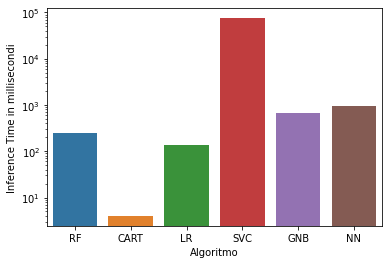

In [39]:
csv = read_csv("InfTimeReport.csv")
g = sbs.barplot(x=csv['Algoritmo'], y=csv['inf15'])
g.set_yscale("log")
plt.ylabel("Inference Time in millisecondi")
plt.show()

## Memoria Occupata

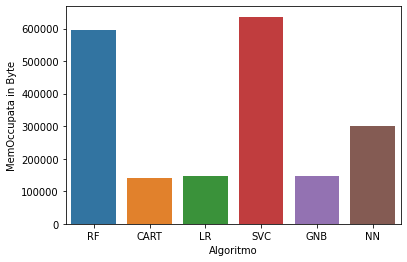

In [40]:
csv = read_csv("MemOccupationReport.csv")
sbs.barplot(x=csv['Algoritmo'], y=csv['Mem15'])
plt.ylabel("MemOccupata in Byte")
plt.show()